In [1]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
#GPT모델 설정
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()
model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("안녕하세요")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bbc38b4db', 'id': 'chatcmpl-D0jSXmX5GukekDn4dB6cD3hC4shpe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019be49d-fbf7-74a3-b590-c72036ed5880-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
#상태 정의하기
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
        State클래스는 TypeDict를 상속받습니다.

        속성:
            mesages(Annotated[list[str], add_messages]) : 메시지들은 "list"타입을 가집니다.
            'add_messages' 함수는 이 상태 키가 어떻게 업데이트 되어야 하는지를 정의합니다.
            (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다) 
    """

    messages : Annotated[list[str], add_messages]

graph_builder = StateGraph(State)

In [4]:
#노드 생성하기
def generate(state: State):
    """
        주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

        매개변수:
        state(State) : 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

        반환값:
        dict :모델이 생성한 응답 메시지를 포함하는 딕셔너리.
            형식은 {"messages": [응답 메시지]}입니다.
    """

    return {"messages":[model.invoke(state["messages"])]}

graph_builder.add_node("generate",generate)

In [5]:
#엣지 설정하기

In [6]:
#graph 선언
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate",END)

graph = graph_builder.compile()


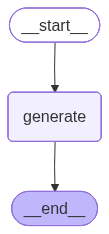

In [10]:
#그래프 도식화
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
#리스트에 문장 추가
response = graph.invoke({"messages" : ["안녕하세요! 저는 젤리입니다."]})

print(type(response))
response

<class 'dict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 젤리입니다.', additional_kwargs={}, response_metadata={}, id='c892c05e-468e-46ad-9956-f20ff8aed4db'),
  AIMessage(content='안녕하세요, 젤리님! 만나서 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 16, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-D0jm2GCfpsSsPpM6khgJ1pTfECjYi', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019be4b0-6b23-7912-ad77-c1e80f8f6ce5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 21, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output

In [13]:
response["messages"].append("내 이름은?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 젤리입니다.', additional_kwargs={}, response_metadata={}, id='c892c05e-468e-46ad-9956-f20ff8aed4db'),
  AIMessage(content='안녕하세요, 젤리님! 만나서 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 16, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-D0jm2GCfpsSsPpM6khgJ1pTfECjYi', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019be4b0-6b23-7912-ad77-c1e80f8f6ce5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 16, 'output_tokens': 21, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output

In [15]:
inputs = {"messages" : [("human","한국과 일본의 관계에 대해서 자세히 알려줘")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content,end="")


한국과 일본의 관계는 역사적으로 매우 복잡하고 다양한 측면이 있습니다. 이 두 나라 간의 관계는 경제, 정치, 문화 등 여러 분야에서 영향을 미치며, 과거의 역사적 사건들이 현재의 관계에도 큰 영향을 미치고 있습니다.

### 역사적 배경
1. **일제강점기 (1910-1945)**: 한국은 1910년부터 1945년까지 일본의 식민 지배를 받았습니다. 이 기간 동안 한국의 문화와 언어가 억압당하고, 많은 한국인이 강제 징용되거나 전쟁에 동원되었습니다. 이 경험은 한국 사회에 깊은 상처를 남겼으며, 일본에 대한 부정적인 감정을 크게 형성했습니다.

2. **전후 관계**: 제2차 세계대전 후, 한국은 일본과의 관계를 정상화하기 위해 1965년에 한일기본조약을 체결했습니다. 이 조약을 통해 일본은 한국에 경제적 지원을 약속하고, 두 나라는 외교 관계를 수립했습니다. 그러나 당시의 역사적 사건들에 대한 진정한 사과와 배상 문제는 여전히 해결되지 않은 채 남아 있습니다.

### 현대의 문제
1. **위안부 문제**: 한국의 '위안부' 피해자 문제는 일본과의 관계에서 큰 쟁점 중 하나입니다. 일본 정부는 과거의 전쟁 범죄에 대해 사과를 했지만, 많은 한국인은 아직도 일본의 입장이 불충분하다고 느끼고 있습니다.

2. **강제 징용 문제**: 일본의 식민지 지배 하에서 강제징용 당한 한국인들의 배상 문제도 논란이 되고 있습니다. 2018년 한국 대법원은 피해자들에게 배상을 하라는 판결을 내렸고, 이에 대해 일본 정부는 국제법 위반이라고 반발하고 있습니다.

3. **반일 감정과 국민 정서**: 이러한 역사적 배경으로 인해 한국 내에서는 일본에 대한 반감이 존재합니다. 이는 종종 경제적, 정치적 관계에도 영향을 미치며, 공공 여론에서 반일 감정이 고조되는 경우가 많습니다.

### 경제적 관계
한국과 일본은 서로에게 중요한 경제 파트너입니다. 양국 간의 물품, 서비스, 인력 교류는 활발히 이루어지고 있으며, 경제적 협력이 이루어지고 있습니다. 그러나 정치적 갈등이 경제 